In [ ]:
# This is part 1 where you want F(t)=0 tested

%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 50.
gamma = 1.
m = 20.
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.0
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.0
b42 = 0.0
b43 = 1.0

f_over_m = lambda t: 0
f_xy_x = lambda t,x,v:v
f_xy_v = lambda t,x,v: f_over_m(t)-2*gamma*v-k*x
tf = 10.0
ti = 0.0
n = 500
dt = (tf-ti)/(n-1)
x_TS = np.linspace(ti,tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0]=ti
x[0]=x_iv
v[0]=v_iv

#exact solution
omega_n=sqrt(k/m)
zeta_ud=gamma/(2*m*omega_n)
omega_d=omega_n*sqrt(1-zeta_ud**2)

A= x_iv
B= v_iv
DI= A
DII= (B+A*zeta_ud*omega_n)/omega_d


# define rk4xt
def rk4_x (ti,xi,vi,dt):
    K1 = f_xy_x(ti,xi,vi)
    K2 = f_xy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = f_xy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = f_xy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    x_1= xi+(c1*K1+c2*K2+c3*K3+c4*K4) * dt
    return x_1

#define rk4vt
def rk4_v (ti,xi,vi,dt):
    K1 = f_xy_v(ti,xi,vi)
    K2 = f_xy_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_xy_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_xy_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    v_1=vi+(c1* K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return v_1


def xud_of_t (DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(DI*cos(omega_d*t)+DII*sin(omega_d*t))


def vud_of_t (DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (
        omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operation
for i in range(1, n):
    t[i] = ti+i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1], v[i-1],dt)
    
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
fig = plt.figure(figsize=(6,6))

plt.plot(t,x,label="x vs. t",color="k",linewidth="2.0")
plt.plot(t,v,label="x vs. t",color="g",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

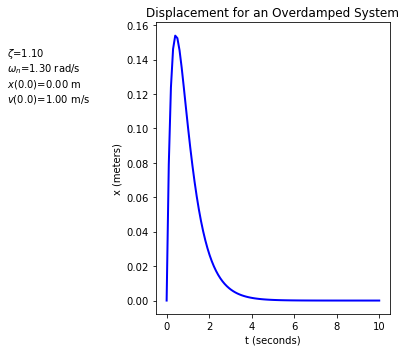

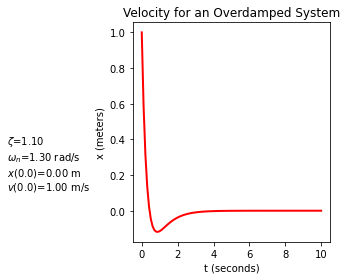

In [3]:
#This is the overdamped case

%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 5.
gamma = 1
m = 1
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
#fprime of x(t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)
ti = 0.0
tf = 10.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 1.0  # x(0) initial value
v_iv = 0.0  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)

zeta_od = 10
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))


zeta = 1.1
omega_n = 1.3


t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]
v = [v_of_t(lambda_I, lambda_II,tval) for tval in t]
fig = plt.figure(figsize=(7,5))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = -0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (seconds)")
plt.ylabel("x (meters)")
plt.tight_layout()
plt.show()

plt.plot(t,v,label="v vs. t",color="r",linewidth="2.0")
plt.title("Velocity for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = -0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (seconds)")
plt.ylabel("x (meters)")
plt.tight_layout()
plt.show()


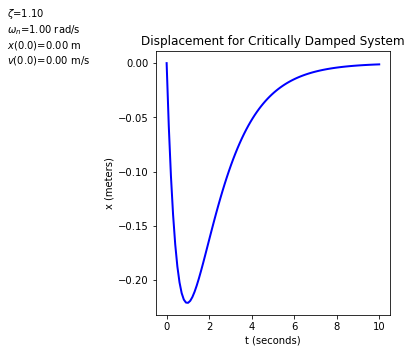

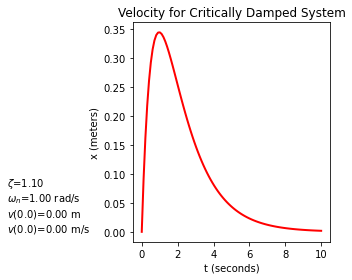

In [4]:
#This is suppose to produce critically damped system

%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 5.
gamma = 1.
m = 1
c1 = 1. / 6
c2 = 2. / 6
c3 = 2. / 6
c4 = 1. / 6
a2 = 1. / 2
a3 = 1. / 2
a4 = 1.
b21 = 1. / 2
b31 = 0.
b32 = 1. / 2
b41 = 0.
b42 = 0.
b43 = 1.

def x_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lI/(lII-lI)*exp(lII*t)
   
#fprime of x(t)

def v_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
   
ti = 0.0
tf = 10.0
n = 500
dt = (tf - ti) / (n - 1)
x_TS = np.linspace(ti, tf, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 1.0  # v(0) initial value
t[0] = ti
x[0] = x_iv
v[0] = v_iv


zeta_ud = 1.


zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

#ti = 0.
#tf = 5.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]
v = [v_of_t(lambda_I, lambda_II,tval) for tval in t]
fig = plt.figure(figsize=(7,5))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = -0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (seconds)")
plt.ylabel("x (meters)")
plt.tight_layout()
plt.show()

plt.plot(t,v,label="v vs. t",color="r",linewidth="2.0")
plt.title("Velocity for Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = -0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$v(${t[0]})={v0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (seconds)")
plt.ylabel("x (meters)")
plt.tight_layout()
plt.show()


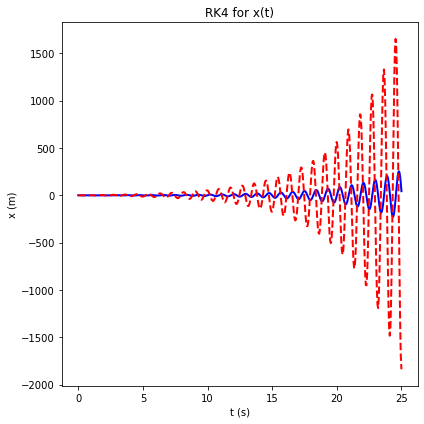

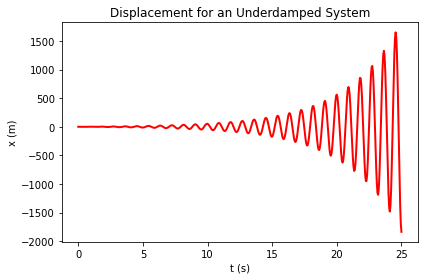

In [1]:
#This is the part for x(t) = Acos(omega*t)
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 50.
gamma = 1.
m = 1.
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.0
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.0
b42 = 0.0
b43 = 1.0
omega_n = sqrt(k/m)
f_over_m = lambda t: 3 * cos(omega_n*t)
f_xy_x = lambda t,x,v:v
f_xy_v = lambda t,x,v: f_over_m(t)-2*gamma*v-k*x
tf = 25.0
ti = 0.0
n = 500
dt = (tf-ti)/(n-1)
x_TS = np.linspace(ti,tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0]=ti
x[0]=x_iv
v[0]=v_iv
#exact solution
omega_n=sqrt(k/m)
zeta_ud=gamma/(2*m*omega_n)
omega_d=omega_n*sqrt(1-zeta_ud**2)

A= x_iv
B= v_iv
DI= A
DII= (B+A*zeta_ud*omega_n)/omega_d



# define rk4xt
def rk4_x (ti,xi,vi,dt):
    K1 = f_xy_x(ti,xi,vi)
    K2 = f_xy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = f_xy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = f_xy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    x_1= xi+(c1*K1+c2*K2+c3*K3+c4*K4) * dt
    return x_1

#define rk4vt
def rk4_v (ti,xi,vi,dt):
    K1 = f_xy_v(ti,xi,vi)
    K2 = f_xy_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_xy_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_xy_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    v_1=vi+(c1* K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return v_1


def xud_of_t (DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(DI*cos(omega_d*t)+DII*sin(omega_d*t))


def vud_of_t (DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (
        omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operation
for i in range(1, n):
    t[i] = ti+i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1], v[i-1],dt)
    
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
fig = plt.figure(figsize=(6,6))

plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t,v,label="x vs. t",color="r",linewidth="2.0",linestyle = "--")
plt.title("RK4 for x(t)")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

plt.plot(t,v,label="x vs. t",color="r",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()